In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from time import time

In [26]:
def clamp(img, m, M):
	img_ = np.copy(img)
	img_[img<m] = m
	img_[img>M] = M
	return img_

def mix(img1, img2, t):
	return img1 * t + img2 * (1.0 - t)

def kernal_size(ratio):
	s = img.shape[:2]
	ks = [int(s[0]*ratio), int(s[1]*ratio)]
	if not ks[0]%2: ks[0] += 1
	if not ks[1]%2: ks[1] += 1
	return (int(ks[0]), int(ks[1]))

In [4]:
imgs = [file for file in os.listdir() if file.endswith(".tiff")]
imgs

['frame_0.tiff']

In [32]:
start = time()
img = cv2.imread(imgs[0])
img = img.astype(float)

blur = cv2.GaussianBlur(img, kernal_size(0.1), 0)
img += blur * 0.1

img[img>255] = 255
img[img<0] = 0
img = img.astype(np.uint8)

print(time()-start)

8.761851787567139


In [35]:
img = img.astype(float)
img += blur * 0.5

img[img>255] = 255
img[img<0] = 0
img = img.astype(np.uint8)

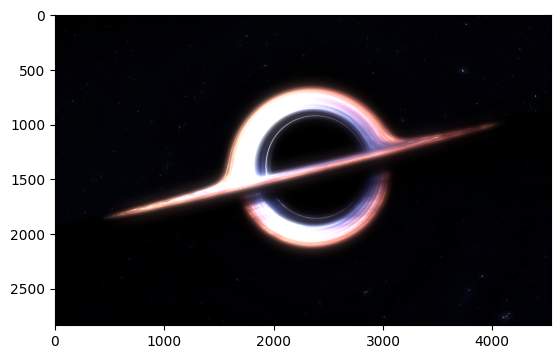

In [37]:
plt.imshow(img[:,:,::-1])
plt.show()